In [1]:
from system import *
import matplotlib.pyplot as plt
import time
import pickle
from scipy.integrate import solve_ivp
import autograd.numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_continuous_lyapunov
from autograd import jacobian
import matplotlib.pyplot as plt
from matplotlib import cm


np.random.seed(232)

In [2]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="-|>", color=color),
        size=size
    )

In [3]:
alpha = 10
phi = lambda x: alpha * np.tanh(x)
f = lambda x: 1 / tau * (-x + phi(W@x + theta))

jacobian_ = jacobian(f)
A = jacobian_(np.zeros(2))

solve_continuous_lyapunov(A, np.eye(A.shape[0]))

array([[ 2.07237056e+01, -8.36097786e-03],
       [-8.36097786e-03,  2.07240240e+01]])

In [37]:
def dynam(x, dt):
    return dt * f(x) + x

def section(x):
    addend = 0
    if x[0] < 0:
        addend = 1
    return abs(x[1]) + addend # lies on positive x axis

def pmap(x, dt=0.001):
    left = False
    while True:
        x = dynam(x, dt)
        if not np.isclose(section(x), 0, atol=0.001):
            left = True
        elif left and np.isclose(section(x), 0, atol=0.001):
            break
    return x

In [47]:
x = np.array([4,0])

In [50]:
convergence = []
try:
    while True:
        x = pmap(np.array(x))
        print(x, end='                       \r')
        convergence.append(x)
finally:
    convergence = np.array(convergence)


KeyboardInterrupt: 

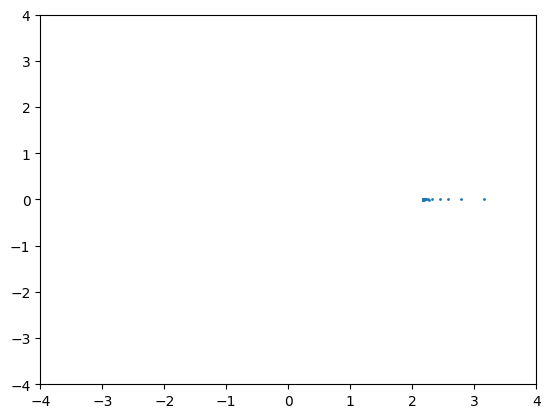

In [52]:
fig, ax = plt.subplots()
ax.scatter(convergence[:,0], convergence[:, 1], s=1)
ax.set_ylim((-4, 4))
ax.set_xlim((-4,4))
plt.show()

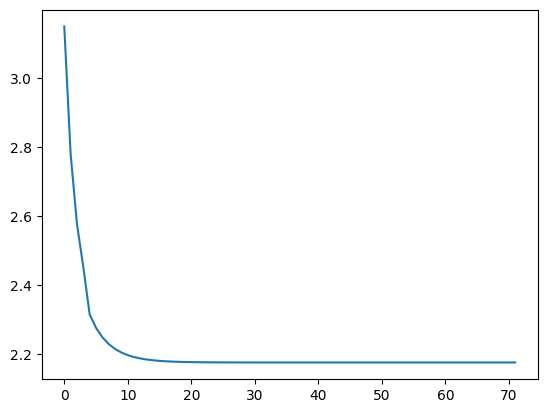

In [57]:
fig, ax = plt.subplots()
ax.plot(np.linalg.norm(convergence, axis=1))
plt.show()

In [48]:
jacobian_ = jacobian(pmap)
A = jacobian_(x)
A

array([[ 0.37055885,  0.00327124],
       [-0.43835662,  0.78995209]])

In [49]:
np.linalg.eig(A)

(array([0.37400635, 0.7865046 ]),
 array([[-0.68832048, -0.00786435],
        [-0.72540673, -0.99996908]]))